In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Uber Case Study\Datasets\uber-raw-data-janjune-15_sample.csv')

df.drop_duplicates(inplace=True)
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])

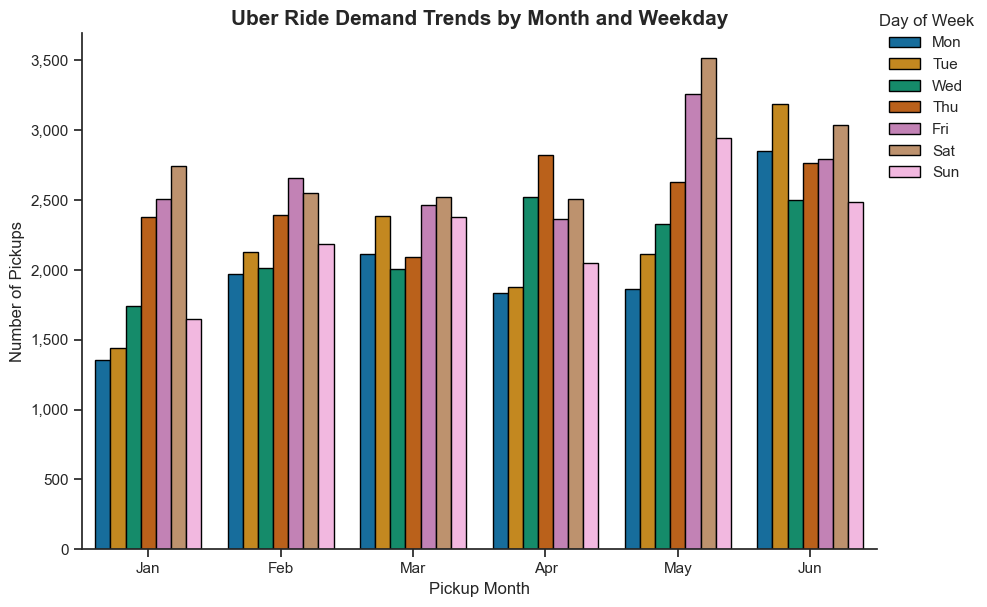

In [3]:
df['Pickup_month_no'] = df['Pickup_date'].dt.month
df['Pickup_day_no'] = df['Pickup_date'].dt.day_of_week

df_pickup_grouped = (df
    .groupby(['Pickup_month_no', 'Pickup_day_no'])
    .size()
    .reset_index(name='Pickup_cnt')
)

# Convert month number to month abbreviation
df_pickup_grouped['Pickup_month'] = pd.to_datetime(
    df_pickup_grouped['Pickup_month_no'], format='%m'
).dt.strftime('%b')

df_pickup_grouped.set_index('Pickup_month', inplace=True)

# Convert day number (0–6) to weekday abbreviation
df_pickup_grouped['Pickup_day'] = pd.to_datetime(
    df_pickup_grouped['Pickup_day_no'].astype(int),
    unit='D',
    origin='1900-01-01'
).dt.strftime('%a')

df_pickup_grouped = df_pickup_grouped.drop(columns=['Pickup_month_no', 'Pickup_day_no'])

# Apply seaborn theme for cleaner visualization
sns.set_theme(style='ticks')

# Create bar plot: x = month, y = count, hue = weekday
ax = sns.catplot(
    data=df_pickup_grouped,
    kind='bar',
    x='Pickup_month',
    y='Pickup_cnt',
    hue='Pickup_day',
    palette='colorblind',   # colorblind-friendly palette
    edgecolor='black',
    height=6,
    aspect=1.5              # make plot wider
)

# Update legend position and title
ax.legend.set_title('Day of Week')
ax.legend.set_loc('upper right')

# Add plot title and axis labels
plt.title('Uber Ride Demand Trends by Month and Weekday', fontsize=15, weight='bold')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Pickups')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:,.0f}'))

plt.show()